In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
train_data = pd.read_csv("../Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("../Data/CE802_P3_Test.csv",sep=',')
lin_file="Results/CE802_P3_Test_LIN_REG.csv"
mlp_file="Results/CE802_P3_Test_MLP.csv"
svr_file="Results/CE802_P3_Test_SVR.csv"



Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:
cleanup = {"F12": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,4,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,2,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,2,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,4,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,4,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,0,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,1,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,2,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
cleanup = {"F4": {"UK":1, "USA":2, "Europe":3, "Rest":4}}
train_data = train_data.replace(cleanup)
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,4,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,4,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,1,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,1,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,2,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56


In [7]:
test = test.replace(cleanup)
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,2,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,4,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,4,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,1,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,4,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN


In [8]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test=test.drop('Target',axis=1)

In [9]:
x_scaler = StandardScaler()
X_scaled=x_scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled=y_scaler.fit_transform(y.values.reshape(-1,1))
X_test_scaled=x_scaler.fit_transform(X_test)

In [10]:
X_train, X_valid, y_train, y_valid =train_test_split(X, y,  random_state=1, test_size = 0.2)

In [11]:
X_train_scaled, X_valid_scaled, y_train_scaled, y_valid_scaled =train_test_split(X_scaled, y_scaled, random_state=1, test_size = 0.2)

In [12]:
lr = LinearRegression()
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50), activation="relu",max_iter=10000000)
lsvr = SVR(kernel='rbf', C=1e2, gamma=0.03)

In [13]:
lr.fit(X_train,y_train)
mlp.fit(X_train_scaled, y_train)
lsvr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.03,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
cv_score = cross_val_score(lr, X, y, cv = 5, scoring='neg_mean_squared_error')
print("CV mean score: ", cv_score.mean())
cv_score = cross_val_score(mlp, X_scaled, y, cv = 5, scoring='neg_mean_squared_error')
print("CV mean score: ", cv_score.mean())
cv_score = cross_val_score(lsvr, X_scaled, y_scaled.ravel(), cv = 5, scoring='neg_mean_squared_error')
print("CV mean score: ", cv_score.mean())

CV mean score:  -337619.2622469289
CV mean score:  -19685.007464314876
CV mean score:  -0.15955119472356732


In [15]:
y_predict = lr.predict(X_valid)   
mae = sum((y_predict - y_valid)**2) /len(y_predict)

print(mae)

315530.9023377809


In [16]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_predict})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,441.166435
1,45.78,650.252726
2,0.00,-863.020720
3,112.05,709.387783
4,0.00,-359.257056
5,0.00,-125.229634
6,40.59,213.772233
7,1281.85,2136.755943
8,768.95,1134.872643


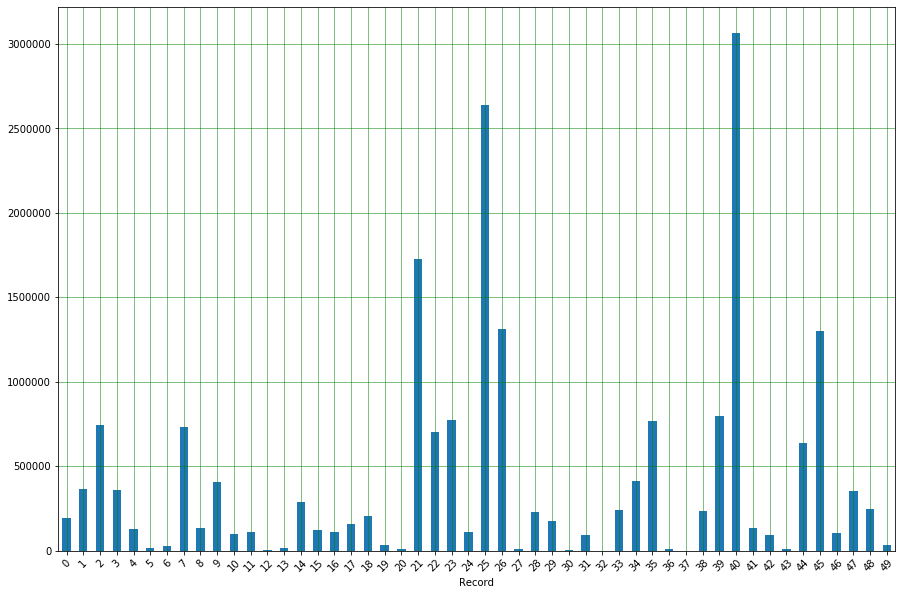

In [17]:
error = (df1['Actual'] - df1['Predicted'])**2

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

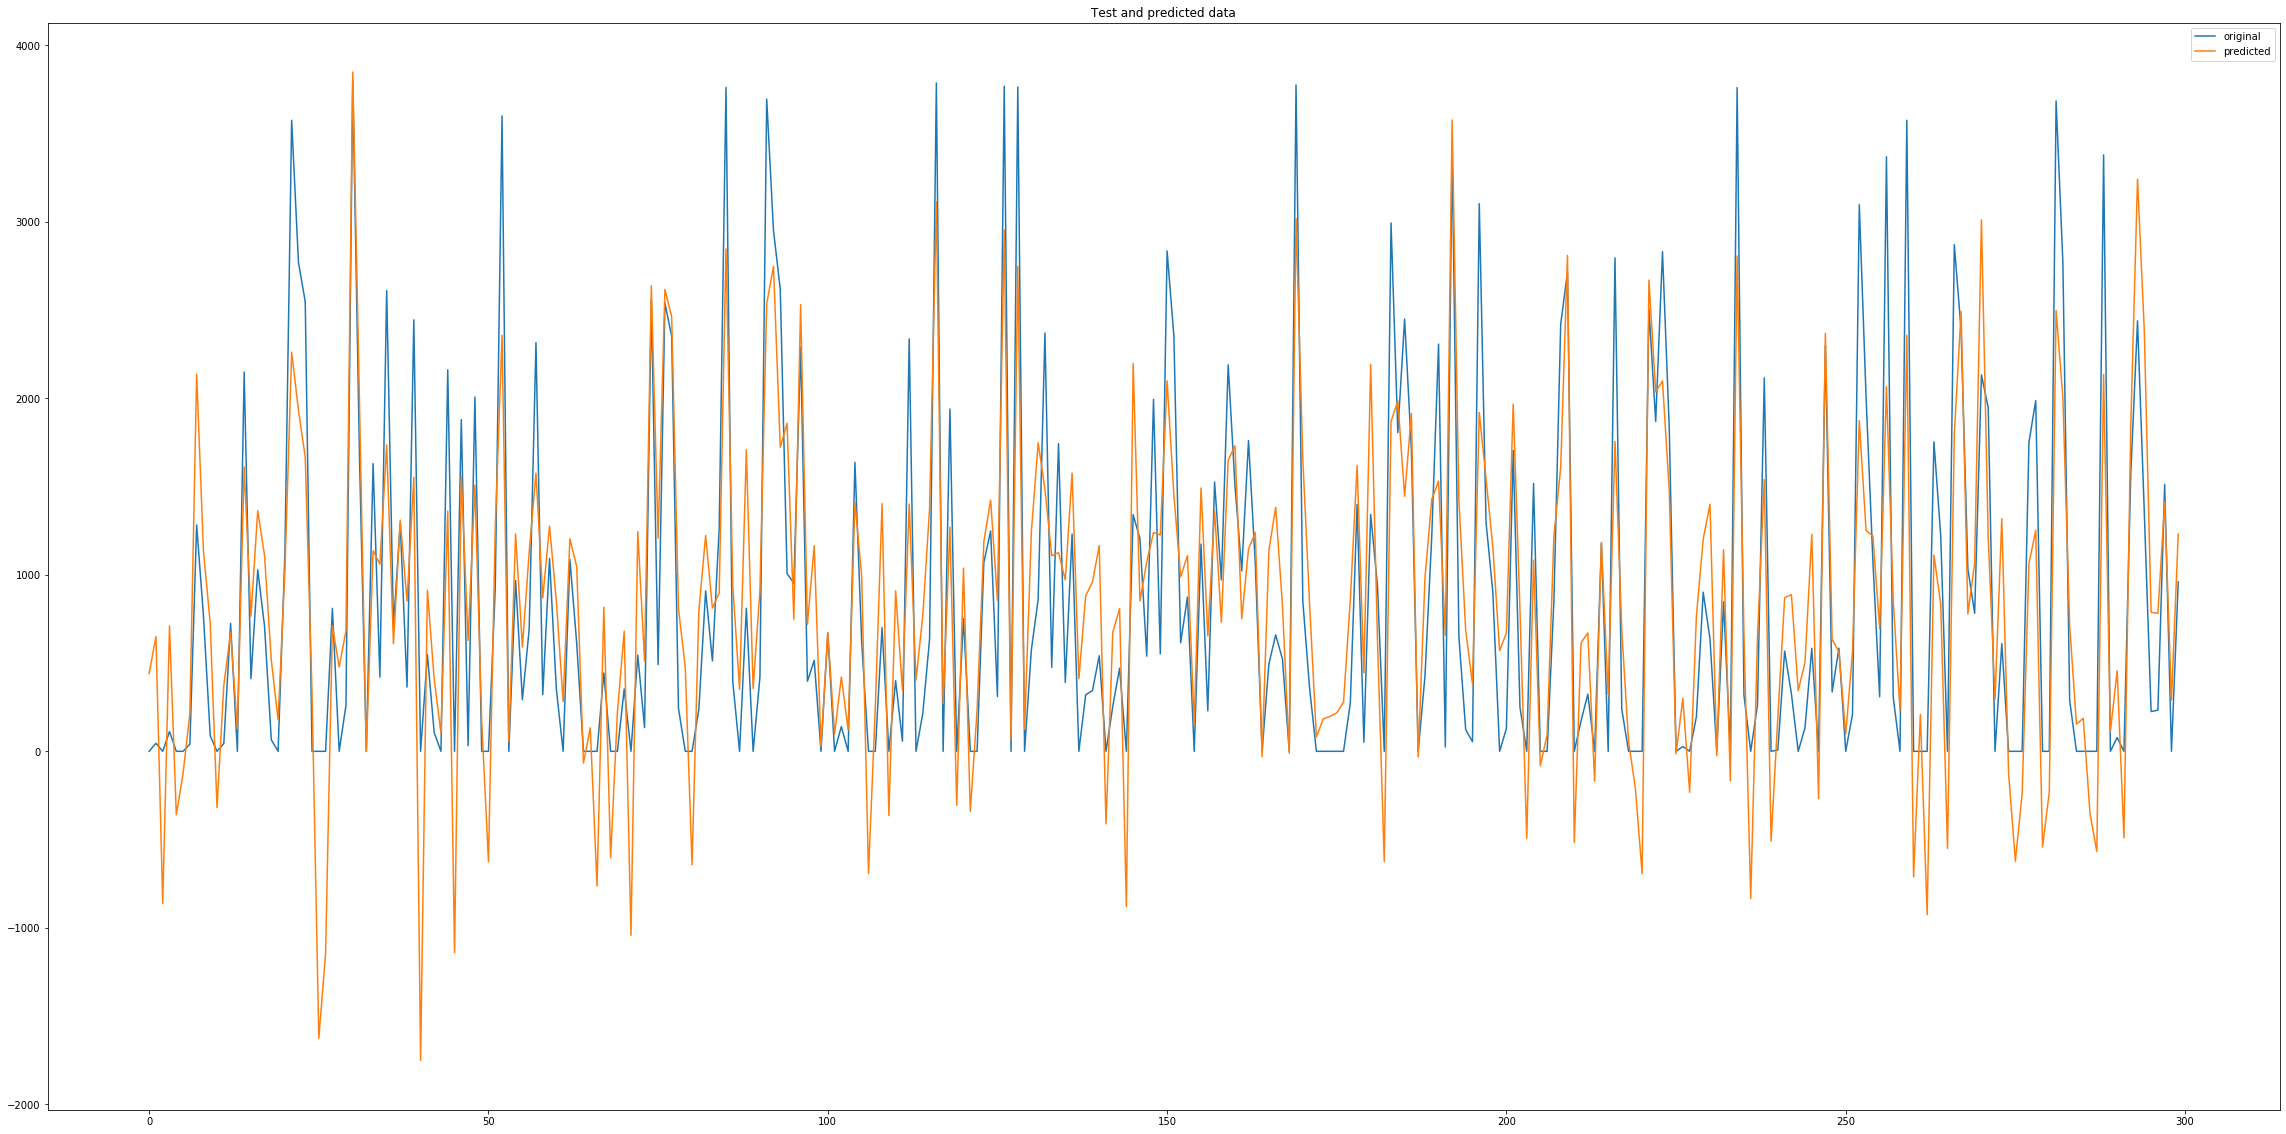

In [18]:
x_ax = range(len(y_valid))
plt.figure(figsize=(40, 20))
plt.plot(x_ax, y_valid, label="original")
plt.plot(x_ax, y_predict, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [19]:
r2_score(y_valid,y_predict)

0.7177630847829279

In [20]:
y_predict = lr.predict(X_test)   
y_predict
for i in range(0,len(y_predict)):
    test_data.loc[i,'Target']=y_predict[i]


In [21]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,1124.240134
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,56.004951
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2440.879256
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1492.800245
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-29.335020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,2893.564328
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,1663.428996
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,952.954252
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-481.779532


In [22]:
test_data.to_csv(lin_file, sep=',')

In [23]:
y_pred=mlp.predict(X_valid_scaled)

In [24]:
print("The Score with ",(r2_score(y_pred, y_valid)))

The Score with  0.9879074627222714


In [25]:
mse = mean_squared_error(y_pred,y_valid )
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  13364.541813867696
RMSE:  6682.270906933848


In [26]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_pred})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,6.134441
1,45.78,44.671587
2,0.00,-0.116580
3,112.05,37.248138
4,0.00,-1.704122
5,0.00,-0.128395
6,40.59,103.782918
7,1281.85,1198.225955
8,768.95,891.678222


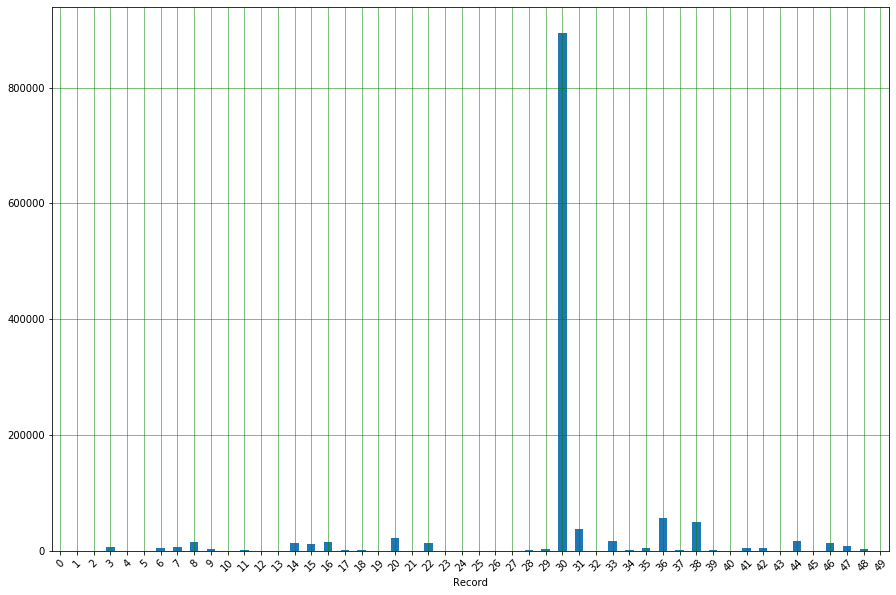

In [27]:
error = (df1['Actual'] - df1['Predicted'])**2

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

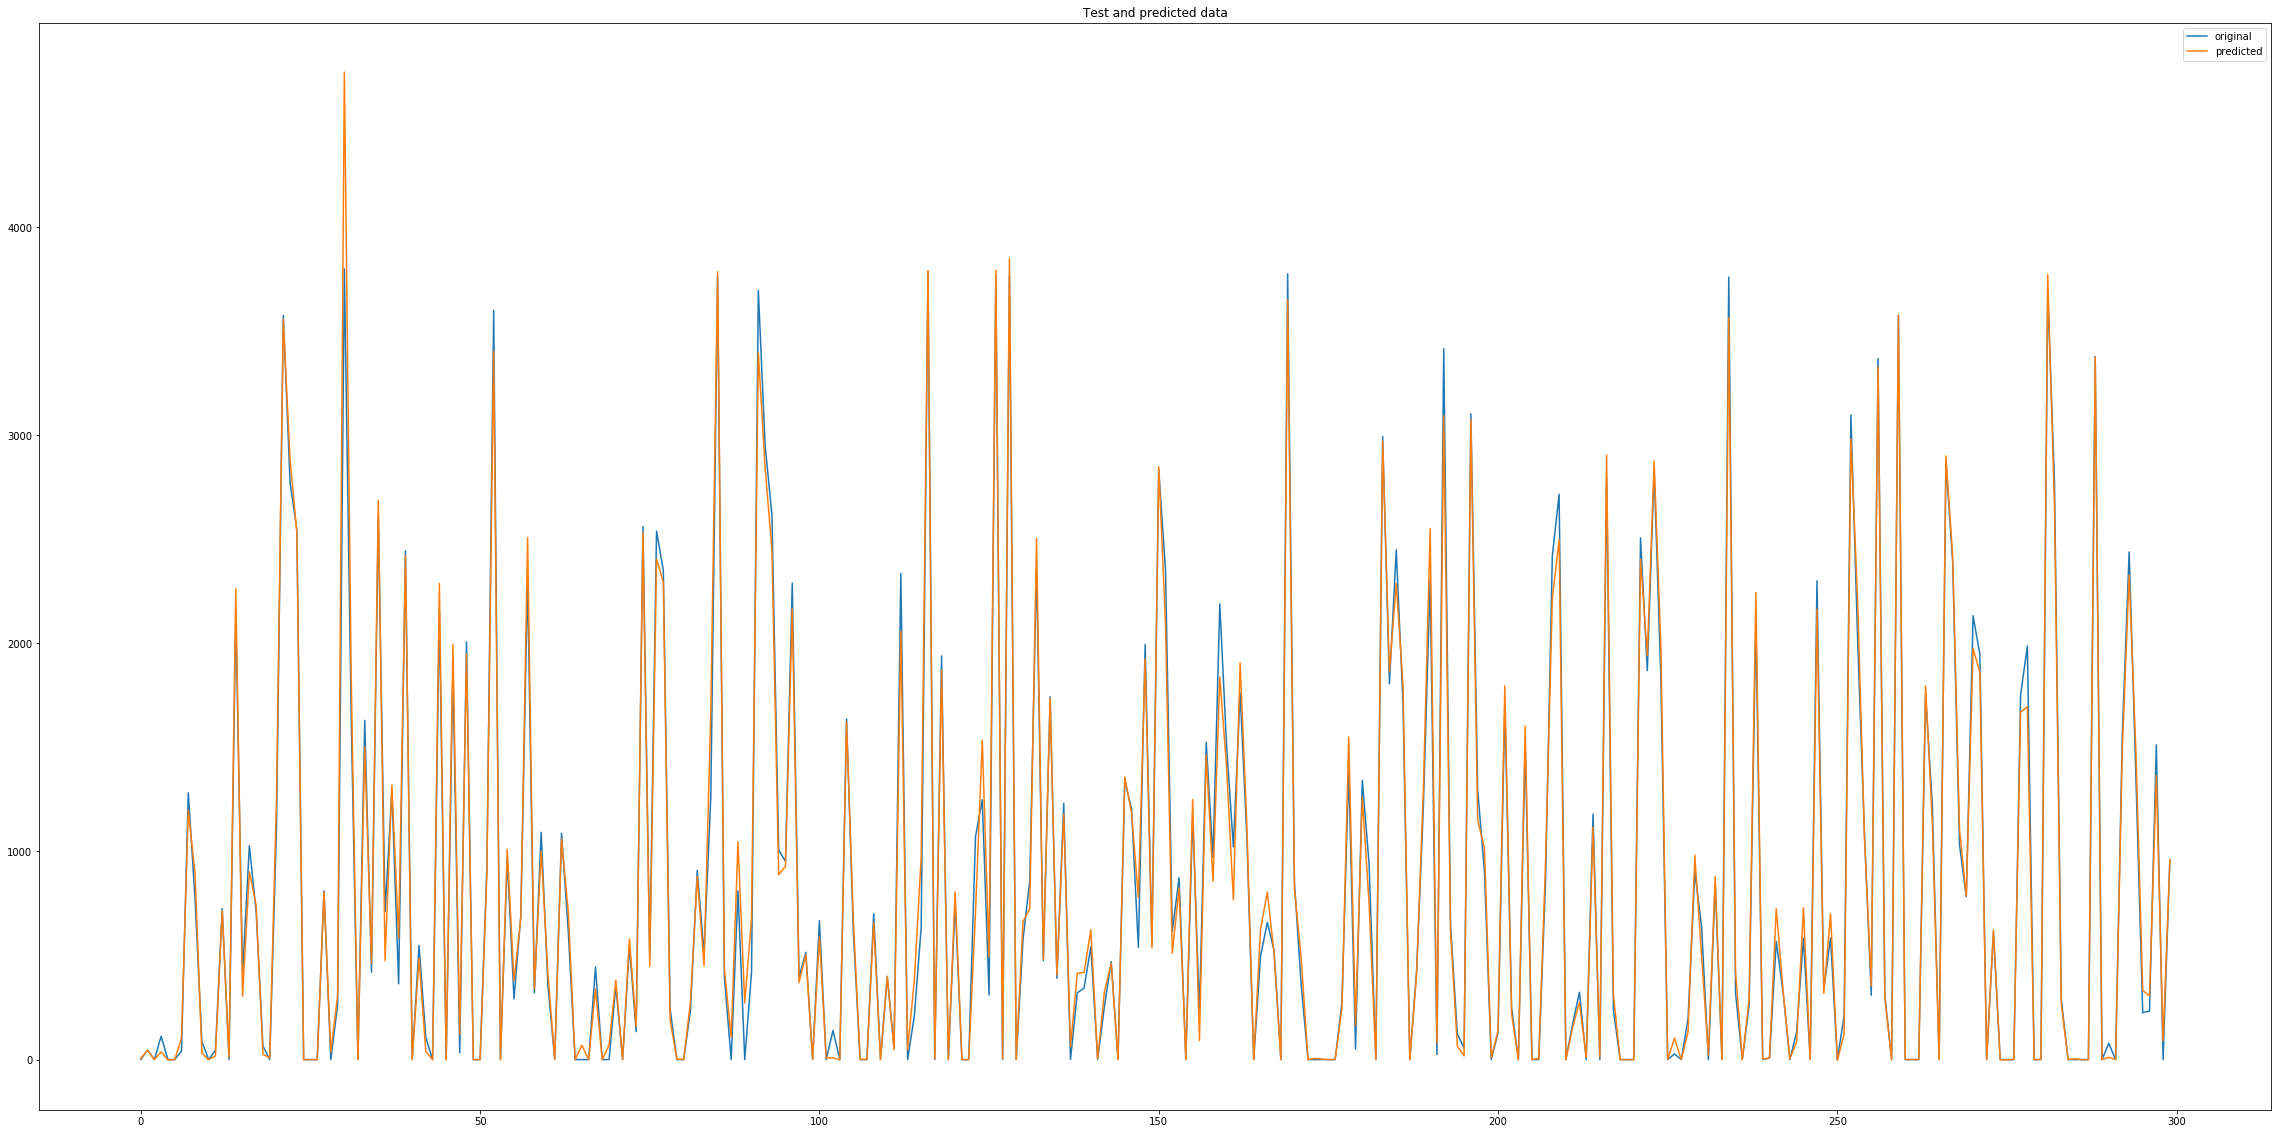

In [28]:
x_ax = range(len(y_valid))
plt.figure(figsize=(40, 20))
plt.plot(x_ax, y_valid, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [29]:
mae = sum((y_valid-y_pred)**2) /len(y_pred)

In [30]:
mae

13364.541813867698

In [31]:
y_pred=mlp.predict(X_test_scaled)
y_pred
for i in range(0,len(y_pred)):
    test_data.loc[i,'Target']=y_pred[i]


In [32]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,566.351841
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,-0.116580
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3609.567454
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2416.473468
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-1.884716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,3947.838698
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,2731.578920
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,471.964439
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-0.119717


In [33]:
test_data.to_csv(mlp_file, sep=',')

In [34]:
ypred = lsvr.predict(X_valid_scaled)

mse = mean_squared_error(y_scaler.inverse_transform(ypred) , y_scaler.inverse_transform(y_valid_scaled.reshape(-1,1)).ravel())
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  163741.06447172814
RMSE:  81870.53223586407


In [35]:
mae = sum((y_scaler.inverse_transform(y_valid_scaled.reshape(-1,1)).ravel() - y_scaler.inverse_transform(ypred) )**2) /len(ypred)

In [36]:
mae

163741.06447172814

In [37]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid_scaled)),'Actual': y_scaler.inverse_transform(y_valid_scaled.reshape(-1,1)).ravel(), 'Predicted': y_scaler.inverse_transform(ypred)})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,0.324680
1,45.78,546.437081
2,0.00,-107.092372
3,112.05,384.016679
4,0.00,54.550190
5,0.00,267.107650
6,40.59,-133.649483
7,1281.85,1437.327317
8,768.95,1268.637219


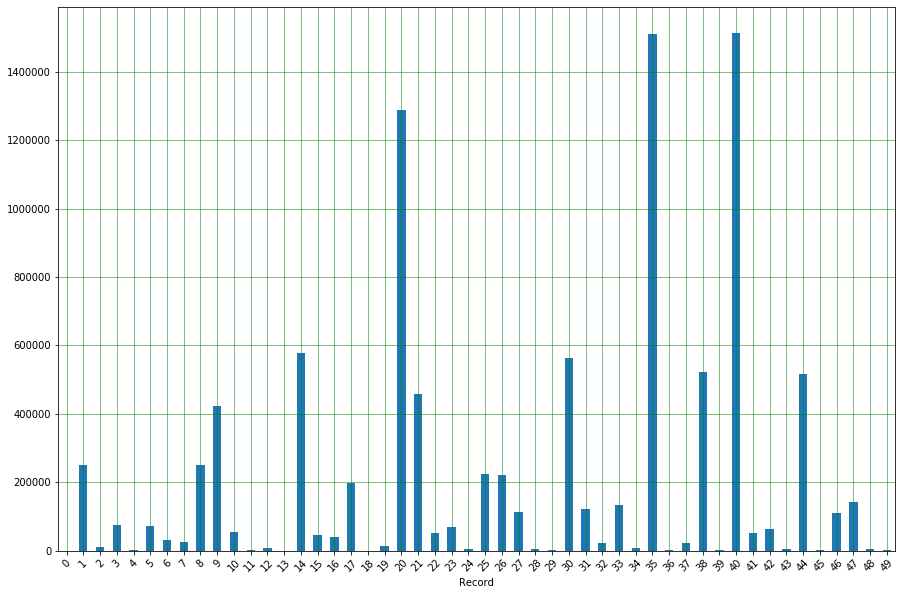

In [38]:
error = (df1['Actual'] - df1['Predicted'])**2


# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

In [39]:
r2_score(ypred, y_valid_scaled)

0.8430591501001347

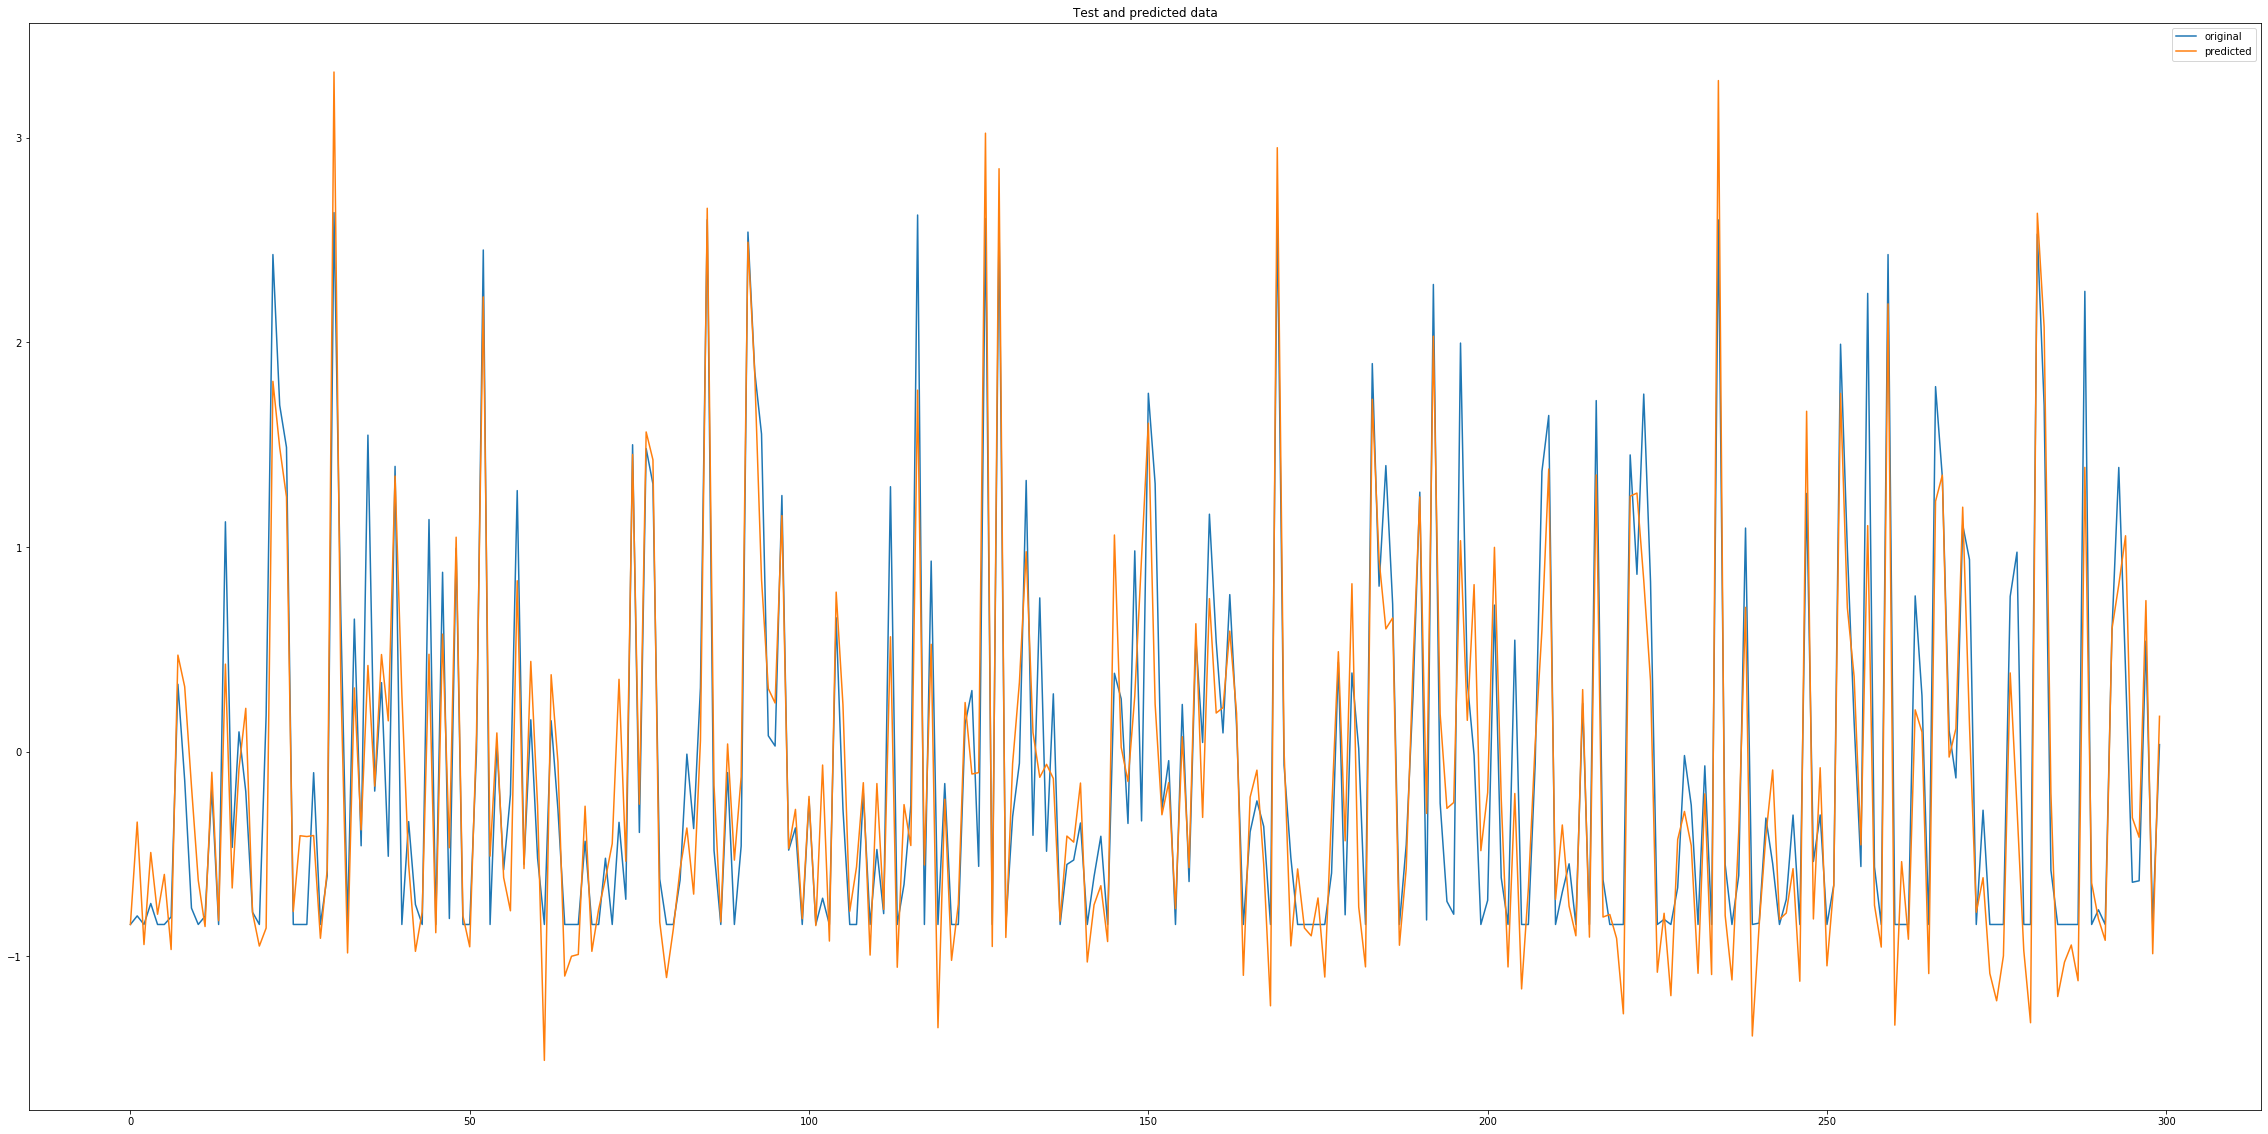

In [40]:
x_ax = range(len(y_valid))
plt.figure(figsize=(40, 20))
plt.plot(x_ax, y_valid_scaled, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [41]:
y_predict = y_scaler.inverse_transform(lsvr.predict(X_test_scaled).reshape(-1,1)).ravel()   
y_predict
for i in range(0,len(y_predict)):
    test_data.loc[i,'Target']=y_predict[i]


In [42]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,689.038631
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,-256.702800
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2830.275140
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1895.051847
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-904.642286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,3988.176836
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,1743.923936
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,680.153004
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-512.278641


In [43]:
test_data.to_csv(svr_file, sep=',')